<a href="https://colab.research.google.com/github/DIFFIDENT24/ML-Practice/blob/main/Decision_Tree_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
#Importing data set
iris=pd.read_csv('/content/Iris.csv')

In [107]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


EDA

In [108]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [109]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [110]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [111]:
#removing unnecessary features
iris=iris.drop(['Id'],axis=1)

In [112]:
#converting Species column to category
iris['Species']=iris['Species'].astype('category')

In [113]:
#Label Encoding
iris['Species']=iris['Species'].cat.codes
iris['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int8

In [127]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


Visualisation

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>],
       [<Axes: title={'center': 'Species'}>, <Axes: >]], dtype=object)

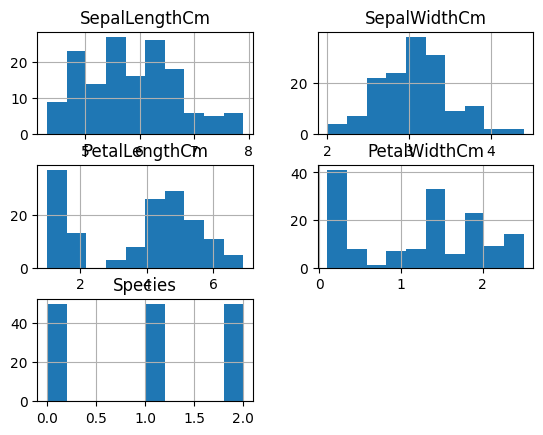

In [129]:
iris.hist()

In [115]:
X=iris.iloc[:,:-1]
Y=iris.iloc[:,-1]

Training and Test data

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=40)

In [117]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
100,6.3,3.3,6.0,2.5
54,6.5,2.8,4.6,1.5
67,5.8,2.7,4.1,1.0
97,6.2,2.9,4.3,1.3
24,4.8,3.4,1.9,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


Model Building

In [118]:
from sklearn.tree import DecisionTreeClassifier


In [119]:
#Post pruning
treemodel=DecisionTreeClassifier()

In [120]:
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [32, 35, 33]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.95\ngini = 0.5\nsamples = 68\nvalue = [0, 35, 33]'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.108\nsamples = 35\nvalue = [0, 33, 2]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.114\nsamples = 33\nvalue = [0, 2, 31]'),
 Text(0.7, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.7, 0.0833333333

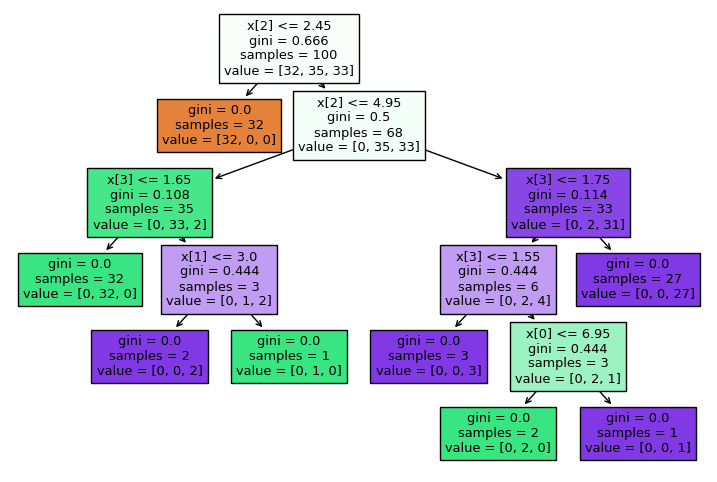

In [121]:
#Decision Tree
from sklearn import tree
plt.figure(figsize=(9,6))
tree.plot_tree(treemodel,filled=True)

In [122]:
y_pred=treemodel.predict(X_test)

In [123]:
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 2, 1, 0], dtype=int8)

In [124]:
from sklearn.metrics import accuracy_score,classification_report

In [125]:
score=accuracy_score(y_pred,Y_test)
print("Accuracy is",score*100,"%")

Accuracy is 100.0 %


In [126]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

